In [71]:
import pandas as pd
import nltk
from nltk.corpus import movie_reviews
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [72]:
nltk.download('movie_reviews')

[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


True

In [73]:
# A list of all the words in 'movie_reviews'
movie_reviews.words()

['plot', ':', 'two', 'teen', 'couples', 'go', 'to', ...]

In [74]:
# Prints total number of words in 'movie_reviews'
len(movie_reviews.words())

1583820

In [75]:
movie_reviews.categories()

['neg', 'pos']

In [76]:
# Displays frequency of words in ‘movie_reviews’
all_words=nltk.FreqDist(movie_reviews.words())
all_words

FreqDist({',': 77717, 'the': 76529, '.': 65876, 'a': 38106, 'and': 35576, 'of': 34123, 'to': 31937, "'": 30585, 'is': 25195, 'in': 21822, ...})

In [77]:
len(all_words)

39768

In [78]:
# Prints frequency of the word 'happy'.
nltk.FreqDist(movie_reviews.words())['happy']

215

In [79]:
# Prints all file ids
movie_reviews.fileids()
# Prints file ids of positive reviews
movie_reviews.fileids("pos")
# Prints file ids of negative reviews.
movie_reviews.fileids("neg")

['neg/cv000_29416.txt',
 'neg/cv001_19502.txt',
 'neg/cv002_17424.txt',
 'neg/cv003_12683.txt',
 'neg/cv004_12641.txt',
 'neg/cv005_29357.txt',
 'neg/cv006_17022.txt',
 'neg/cv007_4992.txt',
 'neg/cv008_29326.txt',
 'neg/cv009_29417.txt',
 'neg/cv010_29063.txt',
 'neg/cv011_13044.txt',
 'neg/cv012_29411.txt',
 'neg/cv013_10494.txt',
 'neg/cv014_15600.txt',
 'neg/cv015_29356.txt',
 'neg/cv016_4348.txt',
 'neg/cv017_23487.txt',
 'neg/cv018_21672.txt',
 'neg/cv019_16117.txt',
 'neg/cv020_9234.txt',
 'neg/cv021_17313.txt',
 'neg/cv022_14227.txt',
 'neg/cv023_13847.txt',
 'neg/cv024_7033.txt',
 'neg/cv025_29825.txt',
 'neg/cv026_29229.txt',
 'neg/cv027_26270.txt',
 'neg/cv028_26964.txt',
 'neg/cv029_19943.txt',
 'neg/cv030_22893.txt',
 'neg/cv031_19540.txt',
 'neg/cv032_23718.txt',
 'neg/cv033_25680.txt',
 'neg/cv034_29446.txt',
 'neg/cv035_3343.txt',
 'neg/cv036_18385.txt',
 'neg/cv037_19798.txt',
 'neg/cv038_9781.txt',
 'neg/cv039_5963.txt',
 'neg/cv040_8829.txt',
 'neg/cv041_22364.txt',


In [80]:
# Prints all words in movie_review with file id ‘neg/cv001_19502.txt’
movie_reviews.words("neg/cv001_19502.txt")

['the', 'happy', 'bastard', "'", 's', 'quick', 'movie', ...]

In [81]:
# Load movie reviews into a DataFrame
documents = [(list(movie_reviews.words(fileid)), category)
             for category in movie_reviews.categories()
             for fileid in movie_reviews.fileids(category)]

# Convert the list of documents into a DataFrame
df = pd.DataFrame(documents, columns=['words', 'category'])

In [82]:
# Display the first few rows of the DataFrame
print(df.head())

                                               words category
0  [plot, :, two, teen, couples, go, to, a, churc...      neg
1  [the, happy, bastard, ', s, quick, movie, revi...      neg
2  [it, is, movies, like, these, that, make, a, j...      neg
3  [", quest, for, camelot, ", is, warner, bros, ...      neg
4  [synopsis, :, a, mentally, unstable, man, unde...      neg


In [83]:
# Display the first few rows of the DataFrame
print(df.tail())

                                                  words category
1995  [wow, !, what, a, movie, ., it, ', s, everythi...      pos
1996  [richard, gere, can, be, a, commanding, actor,...      pos
1997  [glory, --, starring, matthew, broderick, ,, d...      pos
1998  [steven, spielberg, ', s, second, epic, film, ...      pos
1999  [truman, (, ", true, -, man, ", ), burbank, is...      pos


In [84]:
# Display the structure of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   words     2000 non-null   object
 1   category  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


In [85]:
# Display a random sample of the DataFrame
print(df.sample(5))

                                                  words category
1273  [felix, (, sami, bouajila, ,, ", the, siege, "...      pos
1717  [since, most, movies, about, slavery, shield, ...      pos
1581  [eyes, wide, shut, isn, ', t, the, masterpiece...      pos
1571  [hedwig, and, the, angry, inch, (, 2001, ), jo...      pos
1865  [every, once, in, a, while, ,, a, film, sneaks...      pos


In [86]:
# Join the tokenized words into a single string for better readability
df['review_text'] = df['words'].apply(lambda x: ' '.join(x))

# Display the first few rows with the joined text
print(df[['review_text', 'category']].head())


                                         review_text category
0  plot : two teen couples go to a church party ,...      neg
1  the happy bastard ' s quick movie review damn ...      neg
2  it is movies like these that make a jaded movi...      neg
3  " quest for camelot " is warner bros . ' first...      neg
4  synopsis : a mentally unstable man undergoing ...      neg


In [87]:
# Display a random sample of the DataFrame
print(df.sample(5))

                                                  words category  \
1015  [plot, :, a, young, man, who, loves, heavy, me...      pos   
1499  [towards, the, middle, of, ", the, sweet, here...      pos   
1622  [did, you, ever, wonder, if, dennis, rodman, w...      pos   
872   [fact, that, charles, bronson, represents, one...      neg   
1411  [countries, and, legal, systems, that, take, t...      pos   

                                            review_text  
1015  plot : a young man who loves heavy metal music...  
1499  towards the middle of " the sweet hereafter , ...  
1622  did you ever wonder if dennis rodman was actua...  
872   fact that charles bronson represents one of th...  
1411  countries and legal systems that take the rule...  


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   words        2000 non-null   object
 1   category     2000 non-null   object
 2   review_text  2000 non-null   object
dtypes: object(3)
memory usage: 47.0+ KB


In [89]:
# Drop the 'review_text' column
df.drop(columns=['review_text'], inplace=True)

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   words     2000 non-null   object
 1   category  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


In [91]:
# Ensure stopwords are downloaded
nltk.download('stopwords')
# Retrieve a set of English stopwords from NLTK
stop_words = set(stopwords.words('english'))

In [93]:
# Initialize a Porter Stemmer object from NLTK
ps = nltk.PorterStemmer()

In [95]:
# Define a function to preprocess text
def preprocess_text(words):
  return [ps.stem(word.lower()) for word in words if word.isalpha() and word.lower() not in stop_words]


Stemming each word (reducing to its base or root form) and converting to lowercase and it also ensures that each word is alphabetic and not in the set of stopwords using preprocess text function

In [96]:
# Apply the preprocess_text function to each row in the 'words' column of the DataFrame
df['processed_words'] = df['words'].apply(preprocess_text)

# Convert the list of processed words into a single string for each row
df['processed_text'] = df['processed_words'].apply(lambda x: ' '.join(x))

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   words            2000 non-null   object
 1   category         2000 non-null   object
 2   processed_words  2000 non-null   object
 3   processed_text   2000 non-null   object
dtypes: object(4)
memory usage: 62.6+ KB


In [98]:
df.head()

,words,category,processed_words,processed_text
0,"[plot, :, two, teen, couples, go, to, a, churc...",neg,"[plot, two, teen, coupl, go, church, parti, dr...",plot two teen coupl go church parti drink driv...
1,"[the, happy, bastard, ', s, quick, movie, revi...",neg,"[happi, bastard, quick, movi, review, damn, bu...",happi bastard quick movi review damn bug got h...
2,"[it, is, movies, like, these, that, make, a, j...",neg,"[movi, like, make, jade, movi, viewer, thank, ...",movi like make jade movi viewer thank invent t...
3,"["", quest, for, camelot, "", is, warner, bros, ...",neg,"[quest, camelot, warner, bro, first, featur, l...",quest camelot warner bro first featur length f...
4,"[synopsis, :, a, mentally, unstable, man, unde...",neg,"[synopsi, mental, unstabl, man, undergo, psych...",synopsi mental unstabl man undergo psychothera...


In [99]:
# Initialize TfidfVectorizer with a maximum of 1000 features
vectorizer = TfidfVectorizer(max_features=1000)

# Fit and transform the 'processed_text' column from the DataFrame
X = vectorizer.fit_transform(df['processed_text']).toarray()

The fit_transform method learns the vocabulary and transforms the text data into a TF-IDF weighted feature matrix

In [101]:
print(X)

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.05057066]
 ...
 [0.03407112 0.         0.03225177 ... 0.         0.         0.04626159]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [100]:
print("Shape of X:", X.shape)

Shape of X: (2000, 1000)


In [116]:
# WCSS (within-cluster sum of squares) for different values of k
wcss = []

# Try clustering for a range of k values
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(X)
    # Append the WCSS for the current k to the list
    wcss.append(kmeans.inertia_)

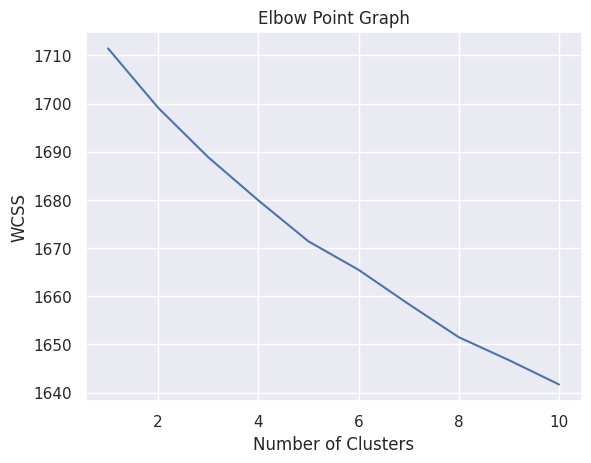

In [117]:
# plot an elbow graph
sns.set()
plt.plot(range(1,11), wcss)
plt.title('Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [118]:
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5, random_state=42)

In [103]:
df['cluster'] = kmeans.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [104]:
# Get cluster labels
cluster_labels = kmeans.labels_

# Print cluster labels assigned to each document
print("Cluster labels:", cluster_labels)

Cluster labels: [4 4 2 ... 3 2 3]


In [105]:
print("Customer Segmentation Results:")
print(df[['processed_text', 'cluster']].head())

Customer Segmentation Results:
                                      processed_text  cluster
0  plot two teen coupl go church parti drink driv...        4
1  happi bastard quick movi review damn bug got h...        4
2  movi like make jade movi viewer thank invent t...        2
3  quest camelot warner bro first featur length f...        3
4  synopsi mental unstabl man undergo psychothera...        4


In [106]:
print(df[['processed_text', 'cluster']].tail())

                                         processed_text  cluster
1995  wow movi everyth movi funni dramat interest we...        4
1996  richard gere command actor alway great film ev...        3
1997  glori star matthew broderick denzel washington...        3
1998  steven spielberg second epic film world war ii...        2
1999  truman true man burbank perfect name jim carre...        3


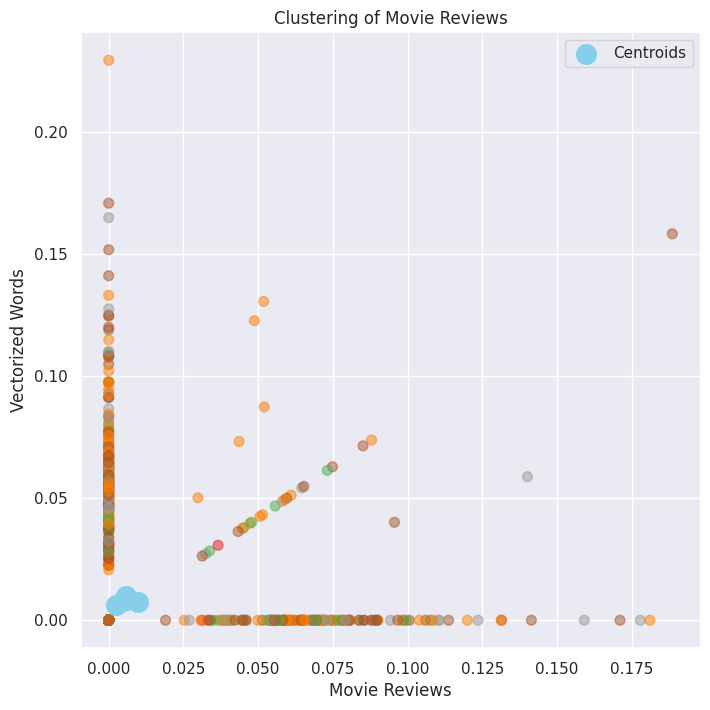

In [136]:
plt.figure(figsize=(8,8))
plt.scatter(X[:, 0], X[:, 1], c=df['cluster'], cmap='Set1', s=50, alpha=0.5)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='skyblue', label='Centroids')
plt.title('Clustering of Movie Reviews')
plt.xlabel('Movie Reviews')
plt.ylabel('Vectorized Words')
plt.legend()
plt.show()

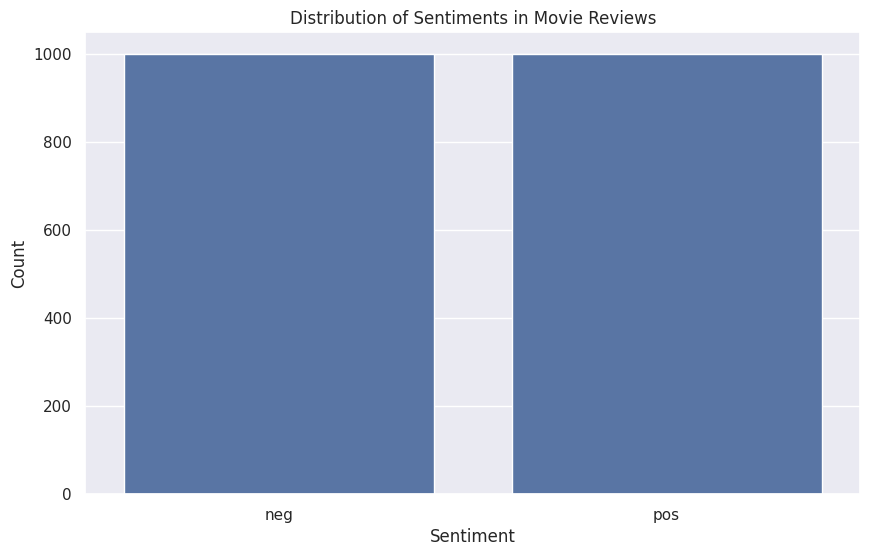

In [124]:
plt.figure(figsize=(10, 6))
sns.countplot(x='category', data=df)
plt.title('Distribution of Sentiments in Movie Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()